# Machine Learning - Naive bayes classifier

### Does discretizing variables improve classiﬁcation performance, compared to the Gaussian naive Bayes approach? 

In [284]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns 
import sklearn 
%matplotlib inline

import scipy as sc 
import statsmodels.api as sm

### 1) Load data & Preprocess Data:

In [331]:
X = []
y = []
with open('datasets/adult.data', mode='r') as data:
    for line in data:
        atts = line.strip().split(",")
        l = []
        if(atts[-1]==""): continue
        l.append(atts[0]); l.append(atts[1]); l.append(atts[3]); 
        l.append(atts[5]); l.append(atts[6]); l.append(atts[7]); 
        l.append(atts[8]); l.append(atts[9]); 
        l.append(atts[12]); l.append(atts[13]);
        X.append(l)
        y.append(atts[-1]) 
        
print(X[0])
print(y[0])

x_g = pd.DataFrame(X)



['39', 'State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '40', 'United-States']
<=50K


In [413]:
# data information

from collections import Counter
print('There are', len(X), 'instances')
print('There are', len(X[0]), "attributes, for example:", X[0])
num_att = len(X[0])
print('There are', len(set(y)), "class labels:", set(y))   
#use Counter to count the number of labels
label_counter = Counter(y)
print("Label frequencies: %s" %str(label_counter.most_common()))

There are 32561 instances
There are 10 attributes, for example: ['21-40', 'State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'normal', 'United-States']
There are 2 class labels: {'<=50K', '>50K'}
Label frequencies: [('<=50K', 24720), ('>50K', 7841)]


In [333]:
# make another X with dicretized values

def discretize_age(age):
    if(age<=20): return "<20"
    elif(20<age<=40): return "21-40"
    elif(40<age<=60): return "41-60"
    elif(60<age<=80): return "61-80"
    elif(60<age<=80): return "61-80"
    elif(age>80): return ">80"
    
def discretize_hours(h):
    if(h<=30): return "low"
    elif(30<h<=50): return "normal"
    elif(h>50): return "high"
    
discretized_x = []

for instance in X:
    age = discretize_age(int(instance[0]))
    h = discretize_hours(int(instance[8]))
    l = instance
    l[0] = age
    l[8] = h
    discretized_x.append(l)
    
x_dis = pd.DataFrame(discretized_x)
print(discretized_x[0:5])

[['21-40', 'State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'normal', 'United-States'], ['41-60', 'Self-emp-not-inc', 'Bachelors', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 'low', 'United-States'], ['21-40', 'Private', 'HS-grad', 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 'normal', 'United-States'], ['41-60', 'Private', '11th', 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 'normal', 'United-States'], ['21-40', 'Private', 'Bachelors', 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 'normal', 'Cuba']]


AGE: min: 17, mean: 38.58164675532078, max: 90


Text(0.5, 1.0, 'AGE')

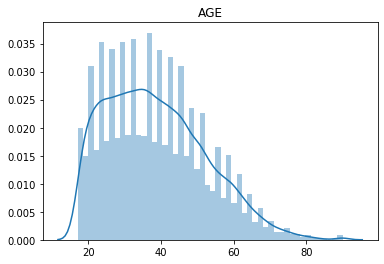

In [570]:
print("AGE: min: {}, mean: {}, max: {}".format(np.min(list(map(int,x_g[0]))),np.mean(list(map(int,x_g[0]))),np.max(list(map(int,x_g[0])))))
sns.distplot(list(map(int,x_g[0]))).set_title("AGE")

In [197]:
# print("AGE: min: {}, mean: {}, max: {}".format(np.min(data[0]),np.mean(data[0]),np.max(data[0])))
#sns.distplot(data[12]).set_title("hours")

### 2) Train model:

In [350]:
# Split data:

xdis_train, xdis_test, ydis_train, ydis_test = train_test_split(x_dis, y, test_size=0.33)
xgaus_train, xgaus_test, ygaus_train, ygaus_test = train_test_split(x_g, y, test_size=0.33)

In [511]:
# a) training discretized 

#i) compute priors:
label_counter = Counter(y)
under50k, over50k = label_counter.most_common()
print(under50k)
print(over50k)

n_under = under50k[1]
n_over = over50k[1]

p_under = under50k[1]/(under50k[1]+over50k[1])
p_over = over50k[1]/(under50k[1]+over50k[1])

print(p_under)
print(p_over)

('<=50K', 24720)
('>50K', 7841)
0.7591904425539756
0.2408095574460244


In [541]:
#ii) compute conditional probailities with laplace smoothing 

# a) make data structure
bayes_p = []

for att_n in xdis_train:
    d = {}
    d2 = {}
    for att in set(xdis_train[att_n]):
        d.update({att:1})
        d2.update({att:1})
    bayes_p.append({"<=50K":d, ">50K":d2})

print(bayes_p[0])


{'<=50K': {'41-60': 1, '21-40': 1, '>80': 1, '61-80': 1, '<20': 1}, '>50K': {'41-60': 1, '21-40': 1, '>80': 1, '61-80': 1, '<20': 1}}


In [600]:

bayes_p_noSmooth = []

for att_n in xdis_train:
    d = {}
    d2 = {}
    for att in set(xdis_train[att_n]):
        d.update({att:0.01})
        d2.update({att:0.01})
    bayes_p_noSmooth.append({"<=50K":d, ">50K":d2})

print(bayes_p_noSmooth[0])

{'<=50K': {'41-60': 0.01, '21-40': 0.01, '>80': 0.01, '61-80': 0.01, '<20': 0.01}, '>50K': {'41-60': 0.01, '21-40': 0.01, '>80': 0.01, '61-80': 0.01, '<20': 0.01}}


In [542]:
# b) count to get probabilities

for column_n in range(len(xdis_train.columns)): #every column
    n = 0
    for att in xdis_train[column_n]:            #every row
        bayes_p[column_n][ydis_train[n]][att]+=1
        n+=1
        
print(bayes_p[0])

{'<=50K': {'41-60': 4611, '21-40': 9196, '>80': 60, '61-80': 1129, '<20': 1601}, '>50K': {'41-60': 2794, '21-40': 2054, '>80': 9, '61-80': 370, '<20': 1}}


In [601]:
for column_n in range(len(xdis_train.columns)): #every column
    n = 0
    for att in xdis_train[column_n]:            #every row
        bayes_p_noSmooth[column_n][ydis_train[n]][att]+=1
        n+=1
        
#print(bayes_p_noSmooth[0])

In [446]:
# Gausssian Model:

n = 0
age_above50 = []
age_under50 = []
for i in xgaus_train[0]:
    if ygaus_train[n] == '>50K': age_above50.append(i)
    elif ygaus_train[n] == '<=50K': age_under50.append(i)
    n+=1
# print(age_above50)

age_above50_mean = np.mean(list(map(int,age_above50)))
age_above50_std = np.std(list(map(int,age_above50)))
age_under50_mean = np.mean(list(map(int,age_under50)))
age_under50_std = np.std(list(map(int,age_under50)))

print(age_above50[0:5])
print(age_under50[0:5])

print(age_above50_mean)
print(age_above50_std)
print(age_under50_mean)
print(age_under50_std)

n = 0
h_above50 = []
h_under50 = []
for i in xgaus_train[8]:
    if ygaus_train[n] == '>50K': h_above50.append(i)
    elif ygaus_train[n] == '<=50K': h_under50.append(i)
    n+=1
# print(h_above50)

h_above50_mean = np.mean(list(map(int,h_above50)))
h_above50_std = np.std(list(map(int,h_above50)))
h_under50_mean = np.mean(list(map(int,h_under50)))
h_under50_std = np.std(list(map(int,h_under50)))

print(h_above50_mean)
print(h_above50_std)
print(h_under50_mean)
print(h_under50_std)




['51', '54', '46', '48', '45']
['49', '32', '37', '49', '20']
44.22798621745789
10.517409438856955
36.75866433608583
14.066439755048803
45.41653905053599
11.0807250509294
38.787475137122534
12.335427728648847


In [553]:
# make gaus data structure
bayes_p_gaus = []

bayes_p_gaus.append({"<=50K":{"mean": age_above50_mean, "std":age_above50_std}, 
                     ">50K":{"mean": age_under50_mean, "std":age_under50_std}})

l = [1,2,3,4,5,6,7,8,9]

for att_n in l:
    if att_n == 8:
        bayes_p_gaus.append({"<=50K":{"mean": h_above50_mean, "std":h_above50_std}, 
                     ">50K":{"mean": h_under50_mean, "std":h_under50_std}})
    else:
        d = {}
        d2 = {}
        for att in set(xgaus_train[att_n]):
            d.update({att:1})
            d2.update({att:1})
        bayes_p_gaus.append({"<=50K":d, ">50K":d2})

print(bayes_p_gaus[0])


{'<=50K': {'Local-gov': 1, 'Self-emp-not-inc': 1, 'Without-pay': 1, 'Never-worked': 1, 'Private': 1, 'Self-emp-inc': 1, 'State-gov': 1, '?': 1, 'Federal-gov': 1}, '>50K': {'Local-gov': 1, 'Self-emp-not-inc': 1, 'Without-pay': 1, 'Never-worked': 1, 'Private': 1, 'Self-emp-inc': 1, 'State-gov': 1, '?': 1, 'Federal-gov': 1}}


In [577]:
# add counts to Gaus data structure:

for column_n in range(len(xgaus_train.columns)): #every column
    n = 0
    if column_n == 0 or column_n == 8:
        continue
    for att in xgaus_train[column_n]:            #every row
        bayes_p_gaus[column_n][ygaus_train[n]][att]+=1
        n+=1
        

print(bayes_p_gaus[1])


{'<=50K': {'Local-gov': 2043, 'Self-emp-not-inc': 2389, 'Without-pay': 25, 'Never-worked': 11, 'Private': 23781, 'Self-emp-inc': 669, 'State-gov': 1245, '?': 2215, 'Federal-gov': 813}, '>50K': {'Local-gov': 817, 'Self-emp-not-inc': 979, 'Without-pay': 1, 'Never-worked': 1, 'Private': 6607, 'Self-emp-inc': 799, 'State-gov': 497, '?': 265, 'Federal-gov': 491}}


### 3) Predict:

In [544]:
# predict discretized

predictions_dis = []

for instance in xdis_test.iterrows():
    n = 0
    local_p_over = np.log(p_over)
    local_p_under = np.log(p_under)
    for att in instance[1]:

        u = bayes_p[n]['<=50K'][att] 
        o = bayes_p[n]['>50K'][att]
        
        po = o/n_over
        pu = u/n_under
        
        local_p_over += np.log(po)
        local_p_under += np.log(pu)
        n+=1
        
    if local_p_over<=local_p_under:
        predictions_dis.append('<=50K')
    elif local_p_over>local_p_under:
        predictions_dis.append('>50K')

print(predictions_dis[0:10])
    

['<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K', '>50K', '<=50K']


In [602]:
predictions_dis_nos = []

for instance in xdis_test.iterrows():
    n = 0
    local_p_over = np.log(p_over)
    local_p_under = np.log(p_under)
    for att in instance[1]:

        u = bayes_p_noSmooth[n]['<=50K'][att] 
        o = bayes_p_noSmooth[n]['>50K'][att]
        
        po = o/n_over
        pu = u/n_under
        
        local_p_over += np.log(po)
        local_p_under += np.log(pu)
        n+=1
        
    if local_p_over<=local_p_under:
        predictions_dis_nos.append('<=50K')
    elif local_p_over>local_p_under:
        predictions_dis_nos.append('>50K')

print(predictions_dis_nos[0:10])

['<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K', '>50K', '<=50K']


In [599]:
# predict Gaussian
predictions_gaus = []

for instance in xgaus_test.iterrows():
    n = 0
    local_p_over = np.log(p_over)
    local_p_under = np.log(p_under)
    for att in instance[1]:
        if n==0 or n==8:
            po = sc.stats.norm(loc=bayes_p_gaus[n]['>50K']['mean'],scale=bayes_p_gaus[n]['>50K']['std']).pdf(int(att))
            pu = sc.stats.norm(loc=bayes_p_gaus[n]['<=50K']['mean'],scale=bayes_p_gaus[n]['<=50K']['std']).pdf(int(att))
        else:
            u = bayes_p[n]['<=50K'][att] 
            o = bayes_p[n]['>50K'][att]
            po = o/n_over
            pu = u/n_under
        
        local_p_over += np.log(po)
        local_p_under += np.log(pu)
        n+=1
        
    if local_p_over<=local_p_under:
        predictions_gaus.append('<=50K')
    elif local_p_over>local_p_under:
        predictions_gaus.append('>50K')

print(predictions_gaus[0:10])

['>50K', '>50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K']


### 4) Evaluate:

In [545]:
# evaluate Discretized

correct = 0
for i in range(len(predictions_dis)):
    if predictions_dis[i]==ydis_test[i]: correct+=1
print(correct)
accuracy_dis = correct/len(predictions_dis)
print(accuracy_dis)


8517
0.792573981016192


In [603]:
correct = 0
for i in range(len(predictions_dis_nos)):
    if predictions_dis_nos[i]==ydis_test[i]: correct+=1
print(correct)
accuracy_dis_nos = correct/len(predictions_dis_nos)
print(accuracy_dis_nos)


8519
0.7927600967801973


In [548]:
# Discretized vs 0R

zero_r = []
for i in ydis_test:
    zero_r.append("<=50K")#which is the most likely class

correct = 0
for i in range(len(zero_r)):
    if zero_r[i]==ydis_test[i]: correct+=1
print(correct)
accuracy_zero_r = correct/len(zero_r)
print(accuracy_zero_r)

print("model is {}% more accurate than 0R".format((accuracy_dis-accuracy_zero_r)*100))

8128
0.7563744649171785
model is 3.6199516099013507% more accurate than 0R


In [598]:
# evaluate Gaussian

correct = 0
for i in range(len(predictions_gaus)):
    if predictions_gaus[i]==ygaus_test[i]: correct+=1
print(correct)
accuracy_gaus = correct/len(predictions_gaus)
print(accuracy_gaus)
print("model is {}% more accurate than 0R".format((accuracy_gaus-accuracy_zero_r)*100))
print("Using the Gaussian distribution makes the model {}% more accurate than discretizing continuos variables".format((accuracy_gaus-accuracy_dis)*100))

8338
0.7759166201377257
model is 1.9542155220547142% more accurate than 0R
Using the Gaussian distribution makes the model -1.6657360878466365% more accurate than discretizing continuos variables
